In [2]:
import pandas as pd
import numpy as np
import os, glob
from datetime import datetime, date, timedelta
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm, ticker
import warnings
warnings.filterwarnings('ignore')
def getinfo(place, year):
    df = pd.read_csv('../DataBase/Experiment_period.txt')
    df_ = df[df['region']==place][df['year']==year]
    begintime = pd.to_datetime(df_['begin'].values[0])
    endtime = pd.to_datetime(df_['end'].values[-1])
    # month = str(begintime.month).zfill(2)
    return begintime, endtime

In [3]:
place = 'Keelung'
oripath = '../Results/soundsepration'
dp = pd.read_csv('../Results/soundsepration/experiment_period.txt')

In [4]:
def figure_base_setting(ax):
    ax[0].set_xlim(datetime(2021, 4, 1) ,datetime(2022, 1, 10))
    ax[1].set_xlim(datetime(2022, 4, 1) ,datetime(2023, 1, 10))
    ax[2].set_xlim(datetime(2023, 4, 1) ,datetime(2024, 1, 10))

    # ax[0].grid(axis='y', color='lightgrey')
    # ax[1].grid(axis='y', color='lightgrey')
    # ax[2].grid(axis='y', color='lightgrey')

    ax[0].yaxis.set_minor_locator(MultipleLocator(0.25))
    ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
    
    ax[0].yaxis.set_ticks_position('left')
    # ax[1].yaxis.set_ticks_position('left')
    # ax[2].yaxis.set_ticks_position('left')

    ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%b"))

def figure_base_setting_right(place, color):
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    if place == 'Keelung':
        major = 2000; minor=1000
        ymin=2000; ymax=17000
    else:
        major = 1000; minor=500
        ymin=0; ymax=6500
    rax[0].yaxis.set_minor_locator(MultipleLocator(minor))
    rax[0].yaxis.set_major_locator(MultipleLocator(major))
    rax[1].yaxis.set_minor_locator(MultipleLocator(minor))
    rax[1].yaxis.set_major_locator(MultipleLocator(major))
    rax[2].yaxis.set_minor_locator(MultipleLocator(minor))
    rax[2].yaxis.set_major_locator(MultipleLocator(major))
    
    rax[0].set_yticklabels([])
    rax[1].set_yticklabels([])
    
    rax[0].set_ylim(ymin, ymax)
    rax[1].set_ylim(ymin, ymax)
    rax[2].set_ylim(ymin, ymax)
    # rax[0].spines['right'].set_color('dodgerblue')
    # rax[1].spines['right'].set_color('dodgerblue')
    # rax[2].spines['right'].set_color(color)
    rax[0].tick_params(axis = 'y', color='k', labelcolor = 'k', which='both')
    rax[1].tick_params(axis = 'y', color='k', labelcolor = 'k', which='both')
    rax[2].tick_params(axis = 'y', color='k', labelcolor = 'k', which='both')

../Results/soundsepration/Keelung-5min/20240125_160851_2023_4stage_separation/stats.log
../Results/soundsepration/Keelung-5min/20231206_162010_2021_3stage_separation/stats.log
../Results/soundsepration/Keelung-5min/20240129_100849_2022_3stage_separation/stats.log
/Volumes/home/Research/Detection_snap/Keelung/210519-210606
/Volumes/home/Research/Detection_snap/Keelung/210701-210718
/Volumes/home/Research/Detection_snap/Keelung/210823-210910
/Volumes/home/Research/Detection_snap/Keelung/220423-220512
/Volumes/home/Research/Detection_snap/Keelung/220627-220716
/Volumes/home/Research/Detection_snap/Keelung/220808-220824
/Volumes/home/Research/Detection_snap/Keelung/230417-230505
/Volumes/home/Research/Detection_snap/Keelung/230609-230625
/Volumes/home/Research/Detection_snap/Keelung/230829-230915
/Volumes/home/Research/Detection_snap/Keelung/231215-240106


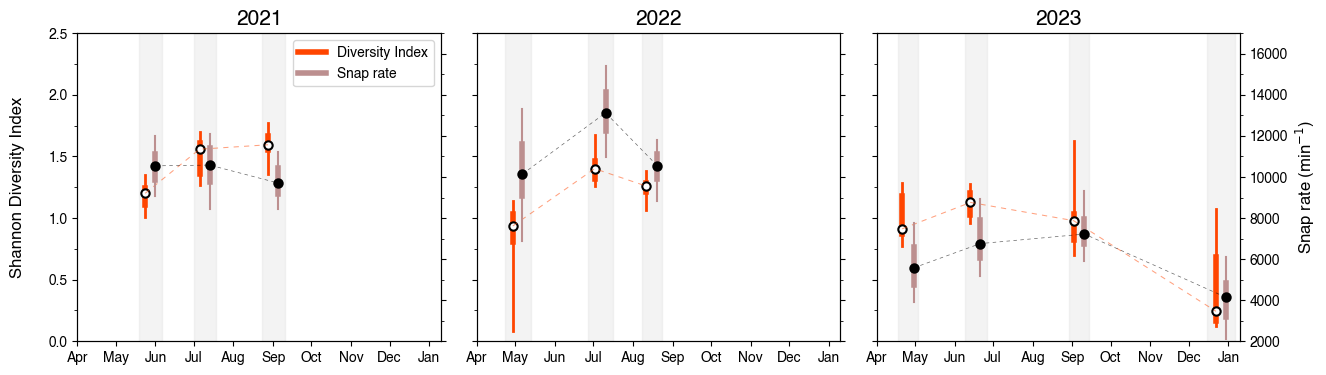

In [5]:
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 3, figsize=(15,4), sharey=True)
plt.subplots_adjust(wspace = 0.1) 


for path in glob.glob(f'{oripath}/{place}-5min/*202?_*stage_separation/*log'):
    year = path.rsplit('_')[2]
    if int(year) == 2023 and '3stage' in path:
        continue 
    else:
        
        color = 'orangered' if 'Keelung' in path else 'dodgerblue'
        region = 'Keelung' if 'Keelung' in path else 'Taoyuan'
        dx = -0.15 if 'Keelung' in path else 0.15

        cmd = ''' awk -F, 'NR>1 {print $0}' %(path)s
        '''%locals()
        response = os.popen(cmd).read()
        res_year = response.rsplit('\n')

        print(path)
        if int(year) == 2021:
            pidx = 0 
        elif int(year) == 2022:
            pidx = 1
        elif int(year) == 2023:
            pidx = 2  
        ax[pidx].set_title(year, fontsize=15, fontweight='bold')
        
        
        linklines_x = []; linklines_y = []
        readcol = 3 if int(year) != 2023 else 4
        for info in res_year[:readcol]:
            stats = info.split(',', 7)
            idx  = int(stats[1])
            pct5 = float(stats[2])
            Q1   = float(stats[3])
            Q2   = float(stats[4])
            Q3   = float(stats[5])
            pct95   = float(stats[6])
            # minn = float(stats[5])
            # maxx = float(stats[6])
            drop = stats[7]
            dp_ = dp[dp['region']==region][dp['year']==int(year)][dp['index']==idx]
            begin = dp_['begin'].values[0]; end = dp_['end'].values[0]
            begintime = datetime.strptime(begin, "%Y-%m-%dT%H:%M:%S")
            endtime = datetime.strptime(end, "%Y-%m-%dT%H:%M:%S")
            dt = endtime - begintime
            ddt = -4
            plottime = begintime + timedelta(days=dt.days/2+ddt)      
            
            ax[pidx].fill_between(x=[begintime,endtime], y1=-0.05, y2=2.5, color='lightgrey', alpha=0.25)
            ax[pidx].plot([plottime, plottime], [pct5, pct95], lw=2, color=color)
            ax[pidx].plot([plottime, plottime], [Q1, Q3], lw=4, color=color, label = 'Diversity Index')
            ax[pidx].plot([plottime], [Q2], marker = 'o', markersize = 6, color='white', mec='k', mew=1.5)# ,edgecolors='k', lw=2
            
            linklines_x.append(plottime); linklines_y.append(Q2)
            # if region == 'Keelung':
                # ax[pidx].text(plottime + timedelta(days=-4), Q2, float("{:.2f}".format(Q2,2)), color=color, alpha=0.8,
                              # ha='right', va ='bottom', fontsize=8, fontweight='heavy')
            # else:
                # ax[pidx].text(plottime + timedelta(days=+4), Q2, float("{:.2f}".format(Q2,2)), color=color, alpha=0.8,
                              # ha='left', va ='bottom', fontsize=8, fontweight='heavy')
            # if 'nan' not in drop :
                # drop_num = eval(drop)
                # ax[pidx].scatter([plottime]*len(drop_num), drop_num,  marker='o', s=5, color='white', edgecolors=color, lw=2, alpha=0.3)
        ax[pidx].plot(linklines_x, linklines_y, ls=(0, (5, 5)), color=color, alpha=0.5, lw=0.75)

rax = [0,0,0]
rax[0] = ax[0].twinx()
rax[1] = ax[1].twinx()
rax[2] = ax[2].twinx()

linklines_x21=[]; linklines_y21=[]
linklines_x22=[]; linklines_y22=[]
linklines_x23=[]; linklines_y23=[]
for dirpath in sorted(glob.glob(f'/Volumes/home/Research/Detection_snap/{place}/??????-??????')):
    if place == 'Keelung': 
        color = 'rosybrown'
    else:
        color = 'royalblue'
    print(dirpath)
    alldf = pd.DataFrame()
    
    if '21' == dirpath.rsplit('/')[-1][:2]:
        year = '2021'
        
    elif '22' == dirpath.rsplit('/')[-1][:2]:
        year = '2022'
        
    elif '23' == dirpath.rsplit('/')[-1][:2]:
        year = '2023'
        
        
    timerange = dirpath.rsplit('/')[-1]
    begin = timerange.rsplit('-')[0]; end = timerange.rsplit('-')[1]
    begintime = datetime.strptime(begin, "%y%m%d")
    endtime = datetime.strptime(end, "%y%m%d")
    dt = endtime - begintime
    ddt = 4
    plottime = begintime + timedelta(days=dt.days/2+ddt)      

    for filepath in sorted(glob.glob(f'{dirpath}/*csv')):
        df = pd.read_csv(filepath)
        alldf = pd.concat([alldf, df])
        
    pct95 = np.percentile(alldf['Peak'], 95, interpolation='linear')
    Q1 = np.percentile(alldf['Peak'], 75, interpolation='linear')
    Q2 = np.percentile(alldf['Peak'], 50, interpolation='linear')
    Q3 = np.percentile(alldf['Peak'], 25, interpolation='linear')
    pct5 = np.percentile(alldf['Peak'], 5, interpolation='linear')
    
    
    # print(Q1, Q2, Q3)
    if year == '2021':
        linklines_x21.append(plottime); linklines_y21.append(Q2)
        rax[0].plot([plottime, plottime], [Q1, Q3], lw=4, color=color)
        rax[0].plot([plottime, plottime], [pct5, pct95], lw=1.5, color=color)
        rax[0].plot([plottime], [Q2], marker = 'o', markersize = 6, color='k', mec='k', mew=1.5)
        # rax[0].text(plottime + timedelta(days=+4), Q2, int(Q2), ha='left', va ='top', fontsize=8, color =color)
    elif year == '2022':
        linklines_x22.append(plottime); linklines_y22.append(Q2)
        rax[1].plot([plottime, plottime], [Q1, Q3], lw=4, color=color)
        rax[1].plot([plottime, plottime], [pct5, pct95], lw=1.5, color=color)
        rax[1].plot([plottime], [Q2], marker = 'o', markersize = 6, color='k', mec='k', mew=1.5)
        # rax[1].text(plottime + timedelta(days=+4), Q2, int(Q2), ha='left', va ='top', fontsize=8, color = color)    
    elif year == '2023':
        linklines_x23.append(plottime); linklines_y23.append(Q2)
        rax[2].plot([plottime, plottime], [Q1, Q3], lw=4, color=color, label='Snap rate')
        rax[2].plot([plottime, plottime], [pct5, pct95], lw=1.5, color=color)
        rax[2].plot([plottime], [Q2], marker = 'o', markersize = 6, color='k', mec='k', mew=1.5)
        # rax[2].text(plottime + timedelta(days=+4), Q2, int(Q2), ha='left', va ='top', fontsize=8, color = color)         

    figure_base_setting_right(place, color)
    rax[2].set_ylabel('Snap rate (min$^{-1}$)', fontsize=12, color='k')
    
rax[0].plot(linklines_x21, linklines_y21, ls=(0, (5, 5)), color='k', alpha=0.6, lw=0.5)    
rax[1].plot(linklines_x22, linklines_y22, ls=(0, (5, 5)), color='k', alpha=0.6, lw=0.5)    
rax[2].plot(linklines_x23, linklines_y23, ls=(0, (5, 5)), color='k', alpha=0.6, lw=0.5)    




figure_base_setting(ax)
ax[0].set_ylim(0, 2.5)
ax[0].set_ylabel('Shannon Diversity Index\n', fontsize=12)

handles, labels = ax[2].get_legend_handles_labels()
_handles, _labels = rax[2].get_legend_handles_labels()
by_label = dict(zip([labels[0], _labels[0]], [handles[0], _handles[0]]))
ax[0].legend(by_label.values(), by_label.keys(), fontsize=10)

plt.savefig(f'../Results/soundsepration/Finalresults/Comparison_index_snaprate_{place}.png', dpi=150)
plt.savefig(f'../Results/soundsepration/Finalresults/Comparison_index_snaprate_{place}.pdf', dpi=150)